In [833]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=60,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=2,
                           random_state=9,
                           class_sep=2)

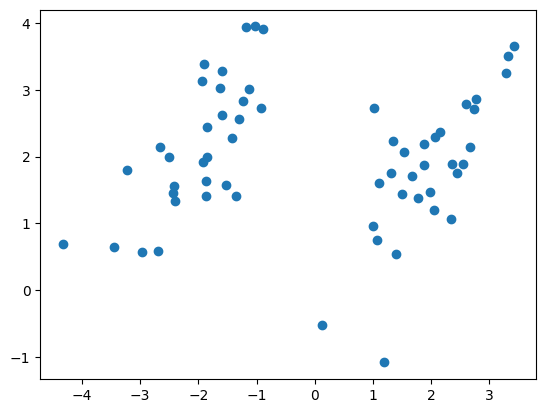

In [834]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

In [835]:
import numpy as np


def update_cluster_centers(X, c):
    centers = np.zeros((2, 2))
    for i in range(1, 3):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

In [836]:
from scipy.cluster.hierarchy import fcluster, linkage

mergings = linkage(X, method='ward')
T = fcluster(mergings, 2, criterion='maxclust')
clusters = update_cluster_centers(X, T)
clusters

array([[ 1.94772593,  1.8161229 ],
       [-1.96705206,  2.19521329]])

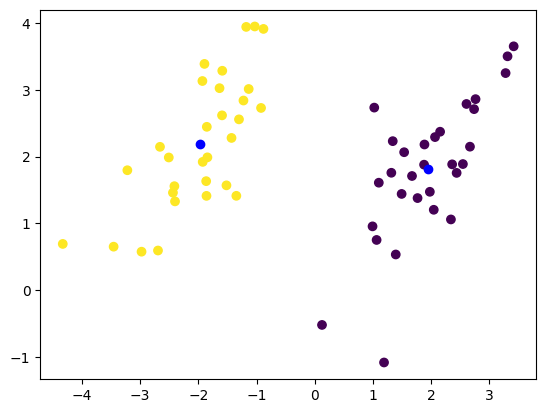

In [837]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.scatter(clusters[:, 0], clusters[:, 1], c='blue')

In [838]:
import math


class SOM:
    def __init__(self, n, c):
        """
        n - количестов атрибутов
        C - количество кластеров
        """
        self.n = n
        self.c = c
        self.a = [0 for _ in range(n)]

    def calculate_a(self, i):
        """
        Вычисление значение шага относительного текущего выбора
        """
        return (50 - i) / 100

    def winner(self, weights, sample):
        """
        Вычисляем выигравший нейрон (вектор) по Евклидову расстоянию
        """
        d0 = 0
        d1 = 0
        for i in range(len(sample)):
            d0 += math.pow((sample[i] - weights[0][i]), 2)
            d1 += math.pow((sample[i] - weights[1][i]), 2)

        if d0 > d1:
            return 0
        else:
            return 1

    def update(self, weights, sample, j):
        """
        Обновляем значение для выигравшего нейрона
        """
        for i in range(len(weights)):
            weights[j][i] = weights[j][i] + self.calculate_a(self.a[j]) * (sample[i] - weights[j][i])

        print(f'\nШаг для {j} кластера = {self.calculate_a(self.a[j])}')
        self.a[j] += 1
        print(f'Веса после обновления:')
        print(weights)

        return weights

In [839]:
# Обучающая выборка (m, n)
# m - объем выборки
# n - количество атрибутов в записи
np.random.shuffle(X)
T = X
m, n = len(T), len(T[0])

# Обучающие веса (n, C)
# n - количество атрибутов в записи
# C - количество кластеров
C = 2

weights = np.random.normal(100, 10, size=(n, C)) / 100
weights

array([[1.05593892, 0.89880423],
       [0.9626736 , 1.10335081]])

In [840]:
som = SOM(n, C)
som

In [841]:
for i in range(m):
    sample = T[i]
    J = som.winner(weights, sample)
    weights = som.update(weights, sample, J)


Шаг для 0 кластера = 0.5
Веса после обновления:
[[-0.08408794  1.86953595]
 [ 0.9626736   1.10335081]]

Шаг для 1 кластера = 0.5
Веса после обновления:
[[-0.08408794  1.86953595]
 [-0.44018272  1.54641377]]

Шаг для 1 кластера = 0.49
Веса после обновления:
[[-0.08408794  1.86953595]
 [ 1.11581734  2.11724587]]

Шаг для 1 кластера = 0.48
Веса после обновления:
[[-0.08408794  1.86953595]
 [ 0.01532176  2.99345972]]

Шаг для 1 кластера = 0.47
Веса после обновления:
[[-0.08408794  1.86953595]
 [-1.16974269  2.52066602]]

Шаг для 1 кластера = 0.46
Веса после обновления:
[[-0.08408794  1.86953595]
 [-0.08455724  0.86331803]]

Шаг для 1 кластера = 0.45
Веса после обновления:
[[-0.08408794  1.86953595]
 [-1.14218358  1.13194486]]

Шаг для 1 кластера = 0.44
Веса после обновления:
[[-0.08408794  1.86953595]
 [ 0.81668481  2.17497437]]

Шаг для 1 кластера = 0.43
Веса после обновления:
[[-0.08408794  1.86953595]
 [-0.02217253  2.53528625]]

Шаг для 1 кластера = 0.42
Веса после обновления:
[[-0.08

In [842]:
s = X[0]
J = som.winner(weights, s)

print(f"Элемент принадлежит к {J} кластеру, на самом деле к {y[0]} кластеру")
print("Обученные веса: ")
print(weights)

Элемент принадлежит к 1 кластеру, на самом деле к 1 кластеру
Обученные веса: 
[[-0.22708821  2.0508661 ]
 [ 0.6261041   2.02443088]]


In [843]:
predicted = np.array([som.winner(weights, s) for s in X])
predicted

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [844]:
y == predicted

array([ True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True])

In [845]:
from sklearn.metrics import accuracy_score

print(f'Точность кластеризации: {accuracy_score(y, predicted) * 100}%')

Точность кластеризации: 70.0%
